## First tryouts


In [80]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [89]:
import pandas as pd
import numpy as np
import datetime


import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

%matplotlib inline

# Lbs to Kg
lbs_kg = 0.454
kg_lbs = 1.0/lbs_kg

# Read data 

dateparse = lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')

# Read/clean data

# This Python 3 environment comes with many helpful analytics libraries installed
FILE="../input/gifts.csv"
d=pd.read_csv(FILE, encoding = "ISO-8859-1")

In [135]:
d['type'] = d['GiftId'].apply(lambda x: x.split('_')[0])
d['id'] = d['GiftId'].apply(lambda x: x.split('_')[1])
types = d['type'].unique()

In [136]:
d['type'].value_counts()

book      1200
ball      1100
horse     1000
doll      1000
blocks    1000
train     1000
bike       500
gloves     200
coal       166
Name: type, dtype: int64

In [137]:
max_weight = { "horse": 10.0 * kg_lbs, "ball": 1.0 * kg_lbs, "bike": 15.0 * kg_lbs, "train": 3.0 * kg_lbs, "coal": 50.0,
              "book": 2.0 * kg_lbs, "doll": 2.0 * kg_lbs, "blocks": 50.0, "gloves": 0.3 * kg_lbs }

min_weight = { "horse": 0.1 * kg_lbs, "ball": 0.1 * kg_lbs, "bike": 7.0 * kg_lbs, "train": 0.1 * kg_lbs, "coal": 0.001,
              "book": 0.1 * kg_lbs, "doll": 0.1 * kg_lbs, "blocks": 0.001, "gloves": 0.05 * kg_lbs }    

value = {"horse": 2.0, "ball": 1.5, "bike": 3.0, "train": 2.0, "coal": 0.0, "book": 2.0, "doll": 2.0, "blocks": 1.0, 
         "gloves": 1.0}

In [138]:
def weight(gift_type):
    if gift_type == "horse":
        return max(0, np.random.normal(5,2,1)[0])
    if gift_type == "ball":
        return max(0, 1 + np.random.normal(1,0.3,1)[0])
    if gift_type == "bike":
        return max(0, np.random.normal(20,10,1)[0])
    if gift_type == "train":
        return max(0, np.random.normal(10,5,1)[0])
    if gift_type == "coal":
        return 47 * np.random.beta(0.5,0.5,1)[0]
    if gift_type == "book":
        return np.random.chisquare(2,1)[0]
    if gift_type == "doll":
        return np.random.gamma(5,1,1)[0]
    if gift_type == "blocks":
        return np.random.triangular(5,10,20,1)[0]
    if gift_type == "gloves":
        return 3.0 + np.random.rand(1)[0] if np.random.rand(1) < 0.3 else np.random.rand(1)[0]

In [106]:
# Build Weights and values
d['weight'] = d['type'].apply(lambda x: weight(x))
d['weight_limited'] = d['type'].apply(lambda x: max(min(weight(x), max_weight[x]), min_weight[x]))
d['weight_kg'] = d['weight_limited'].apply(lambda x: lbs_kg * x)
d['value'] = d['type'].apply(lambda x: value[x])

In [139]:
for t in types:
    mask = d['type'] == t
    d.loc[mask, 'mean_weight'] = d[mask]['weight'].mean()

In [140]:
d.head()

,GiftId,type,id,weight,weight_limited,weight_kg,value,mean_weight
0,horse_0,horse,0,7.238935,5.495886,2.495132,2.0,5.066201
1,horse_1,horse,1,4.036235,4.898610,2.223969,2.0,5.066201
2,horse_2,horse,2,6.482396,5.402619,2.452789,2.0,5.066201
3,horse_3,horse,3,4.897338,7.408887,3.363635,2.0,5.066201
4,horse_4,horse,4,2.901668,5.801013,2.633660,2.0,5.066201


## Light Items ##

Find maximum weights for each item

In [112]:
g = d.groupby(['type']).agg({'weight':max, 'weight_kg':max})
g = g.reset_index()
g.sort_values(by=['weight'],ascending=True,inplace=True)
g

,type,weight_kg,weight
0,ball,1.000000,2.956949
6,gloves,0.300000,3.987168
7,horse,5.437727,11.499524
5,doll,2.000000,14.241783
3,book,2.000000,18.101273
2,blocks,8.981354,19.763155
8,train,3.000000,29.994237
4,coal,21.337998,46.994603
1,bike,15.000000,54.440046


## Submit Requirements ##

 - Must have at least 3 items in each bag
 - 1000 bags
 - Bag over 50 lbs gets removed

In [113]:
# Total amount of weight
d['weight_limited'].sum()

45668.006405007938

In [114]:
from knapsack import knapsack

In [116]:
d[['value', 'weight', 'GiftId']].values[:5]

array([[2.0, 7.238934663594291, u'horse_0'],
       [2.0, 4.036234576574358, u'horse_1'],
       [2.0, 6.482395809073294, u'horse_2'],
       [2.0, 4.897337637138712, u'horse_3'],
       [2.0, 2.901667634755027, u'horse_4']], dtype=object)

In [141]:
knapsack(d[['value', 'weight', 'GiftId']].values[:50], 50)

KeyboardInterrupt: 

In [123]:
d['type'].value_counts()

book      1200
ball      1100
horse     1000
doll      1000
blocks    1000
train     1000
bike       500
gloves     200
coal       166
Name: type, dtype: int64

In [131]:
gb.get_group('ball')[['GiftId', 'weight']]

,GiftId,weight
1000,ball_0,2.357584
1001,ball_1,1.614534
1002,ball_2,1.607345
1003,ball_3,1.877381
1004,ball_4,1.686062
1005,ball_5,1.232925
1006,ball_6,1.565349
1007,ball_7,2.042908
1008,ball_8,2.185734
1009,ball_9,2.046934


In [125]:
submission = pd.DataFrame(columns=['Gifts'])
gb = d.groupby('type')

counter = 10
while counter > 0:
    counter -= 1
    for gift_type in types:
        

In [127]:
gb.groups

{u'ball': Int64Index([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009,
             ...
             2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099],
            dtype='int64', length=1100),
 u'bike': Int64Index([2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109,
             ...
             2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599],
            dtype='int64', length=500),
 u'blocks': Int64Index([5966, 5967, 5968, 5969, 5970, 5971, 5972, 5973, 5974, 5975,
             ...
             6956, 6957, 6958, 6959, 6960, 6961, 6962, 6963, 6964, 6965],
            dtype='int64', length=1000),
 u'book': Int64Index([3766, 3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775,
             ...
             4956, 4957, 4958, 4959, 4960, 4961, 4962, 4963, 4964, 4965],
            dtype='int64', length=1200),
 u'coal': Int64Index([3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609,
             ...
             3756, 3757, 3758, 3759, 3760, 3

## Combinations - How does the distribution look? ##

In [48]:
# Use this to create  multiples
def mul(gift_type,number):
    a=[]
    for i in range(0,number):
        a.append(weight(gift_type))
    return a

Greater than 50lb 7.38 %
Greater than 40lb and less 50lb 9.77%


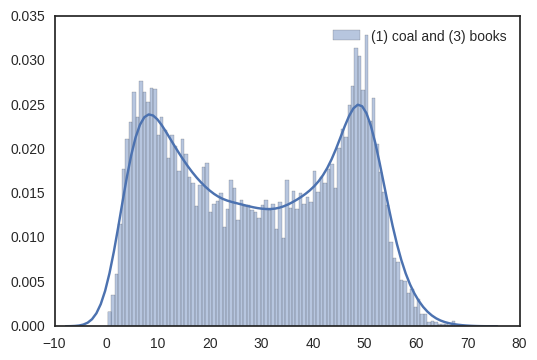

In [49]:
# Working with combinations
# Combine coal and books
# This is just to show the distribution..

a=[]
for i in range(0,10000):
    tmp = mul("coal",1)+mul("book",3) 
    a.append(sum(tmp))

t=pd.DataFrame(a,columns=['weights'])
sns.distplot(t,bins=100,   label="(1) coal and (3) books"  );
print("Greater than 50lb {:03.2f} %".format( t[t['weights'] > 50].sum()[0]/10000)  )
print('Greater than 40lb and less 50lb {:03.2f}%'.format(t[(t['weights'] > 40) & (t['weights'] < 50)   ].sum()[0]/10000.0))
plt.legend();


Greater than 50lb 29.95 %
Greater than 40lb and less 50lb 8.82%


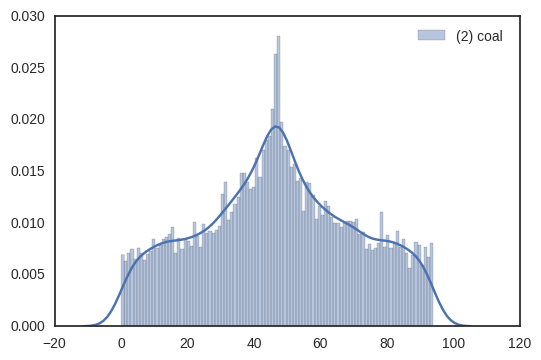

In [50]:
# 2 Coals are more interesting
# ..but probably not a good pick...

a=[]
for i in range(0,10000):
    tmp = mul("coal",2) 
    a.append(sum(tmp))

t=pd.DataFrame(a,columns=['weights'])
sns.distplot(t,bins=100,   label="(2) coal "  );
print("Greater than 50lb {:03.2f} %".format( t[t['weights'] > 50].sum()[0]/10000)  )
print('Greater than 40lb and less 50lb {:03.2f}%'.format(t[(t['weights'] > 40) & (t['weights'] < 50)   ].sum()[0]/10000.0))
plt.legend();

## Quantile Table with Counts ##

Build a table to see what combinations we can do by hand... just to get an idea if we're going in the right direction.

In [51]:
def BuildDef():
    b=[]
    for atype in  ["book","ball","horse","blocks","doll","train","bike","gloves","coal"]:
        b.append([atype, 
                  d[d['type']==atype].quantile(q=0.95, interpolation='linear')[0],
                  d[d['type']==atype].quantile(q=0.85, interpolation='linear')[0],
                  d[d['type']==atype].quantile(q=0.60, interpolation='linear')[0],
                  d[d['type']==atype].quantile(q=0.40, interpolation='linear')[0],
                  d[d['type']==atype].quantile(q=0.20, interpolation='linear')[0]]
                )
    dk=pd.DataFrame(b,columns=['type','q95','q85','q60','q40','q20'])
    return dk
        
        

In [52]:
dk = BuildDef()
# Take a look at what we have
dk['type'].head()

0      book
1      ball
2     horse
3    blocks
4      doll
Name: type, dtype: object

In [53]:
j=d['type'].value_counts().to_frame().reset_index()
def getCount(atype):
    val = j[j['index']==atype].iloc[0]['type']
    return val


dk['count'] = dk['type'].apply(lambda x: getCount(x))
dk.sort_values(by=['q85'],ascending=True,inplace=True)
dk

,type,q95,q85,q60,q40,q20,count
1,ball,2.488794,2.317104,2.090327,1.939876,1.761180,1100
7,gloves,3.846152,3.571068,0.761827,0.444319,0.246285,200
0,book,5.993425,3.664308,1.788637,1.008919,0.453556,1200
2,horse,8.202148,7.046047,5.522695,4.436417,3.331259,1000
4,doll,8.927475,7.147950,5.094679,4.039167,3.084599,1000
3,blocks,17.248938,15.246274,12.254899,10.504291,8.698315,1000
5,train,18.708006,15.722206,11.274114,8.713445,5.731634,1000
6,bike,37.608598,31.375213,22.991718,17.947889,12.120046,500
8,coal,46.867664,45.565370,30.585180,16.588051,4.967933,166


## Sample Submission ##

Score: 31212.68873